In [1]:
import numpy as np
import matplotlib.pyplot as plt

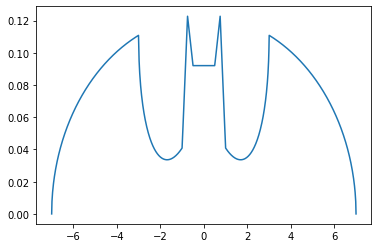

In [7]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3*(1 - (x/7)**2)**0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x))/2 - 3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
        ) / Z
    elif abs(x) > 0.75:
        return (9 - 8*abs(x))/Z
    elif abs(x) > 0.5:
        return (3*abs(x) + 0.75) / Z   
    else:
        return 2.25/Z

x = np.linspace(-7,7,1000)
y = np.vectorize(f)(x)

plt.plot(x, y)
plt.show()

In [13]:
def MH(f, x0, steps):
    states = []
    x = x0

    for _ in range(steps):
        y = np.random.normal(x, 2)

        if np.random.uniform() < min(1, f(y) / f(x)):
            x = y

        states.append(x)
        #I was gonna take only every 100th step, but this works a lot better, and (at least in this case) it isnt that expensive to run

    return states

mh = MH(f, x0 = 0, steps=5000000)

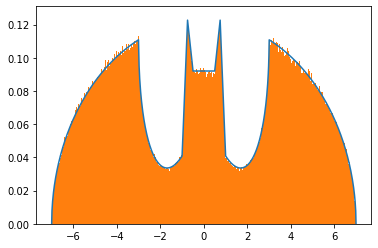

In [15]:
plt.plot(x, y)
plt.hist(mh, density=True, bins = 1000)
plt.show()